In [1]:
# train a perceptron in sklearn
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron
from sklearn.metrics import classification_report


iris = load_iris()
x = iris.data[:, (2,3)]
y = (iris.target == 0).astype(int)

per_clf = Perceptron()
per_clf_fit = per_clf.fit(x,y)

print(classification_report(y,per_clf_fit.predict(x)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       100
           1       1.00      1.00      1.00        50

    accuracy                           1.00       150
   macro avg       1.00      1.00      1.00       150
weighted avg       1.00      1.00      1.00       150



In [2]:
#load fashion mnist dataset

import tensorflow as tf
from tensorflow import keras 

mnist = keras.datasets.fashion_mnist

(x_train_full, y_train_full), (x_test, y_test) = mnist.load_data()

x_valid, x_train = x_train_full[:5000] / 255.0, x_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [3]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover','Dress','Coat',
                'Sandal','Shirt','Sneaker','Bag','Ankle boot']    

In [4]:
# build the neural network

model = keras.models.Sequential() # start the model
model.add(keras.layers.Flatten(input_shape=[28,28])) # This is the input layer. Flatten the data. Original data is 28 by 28 pixels
model.add(keras.layers.Dense(300, activation = 'relu')) # first hidden layer
model.add(keras.layers.Dense(100, activation = 'relu')) # another hidden layer
model.add(keras.layers.Dense(10, activation = 'softmax')) #this is the output layer. 10 neurons for ten fashion classes softmax activation because the classes are exclusive

model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [5]:
# setup the model compiler

model.compile(loss = "sparse_categorical_crossentropy",
                optimizer = 'sgd',
                metrics = ['accuracy'])

In [6]:
#run the model

history = model.fit(x_train, y_train, epochs = 30,
                    validation_data = (x_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 2s 1ms/step - loss: 1.0120 - accuracy: 0.6809 - val_loss: 0.5308 - val_accuracy: 0.8188
Epoch 2/30
1719/1719 [==============================] - 1s 828us/step - loss: 0.4991 - accuracy: 0.8262 - val_loss: 0.4400 - val_accuracy: 0.8556
Epoch 3/30
1719/1719 [==============================] - 1s 811us/step - loss: 0.4462 - accuracy: 0.8434 - val_loss: 0.4266 - val_accuracy: 0.8568
Epoch 4/30
1719/1719 [==============================] - 1s 815us/step - loss: 0.4193 - accuracy: 0.8525 - val_loss: 0.3969 - val_accuracy: 0.8664
Epoch 5/30
1719/1719 [==============================] - 1s 814us/step - loss: 0.4019 - accuracy: 0.8592 - val_loss: 0.3751 - val_accuracy: 0.8760
Epoch 6/30
1719/1719 [==============================] - 1s 832us/step - loss: 0.3794 - accuracy: 0.8648 - val_loss: 0.3692 - val_accuracy: 0.8736
Epoch 7/30
1719/1719 [==============================] - 1s 812us/step - loss: 0.3646 - accuracy: 0.8730 - val_loss: 0.3710 - v

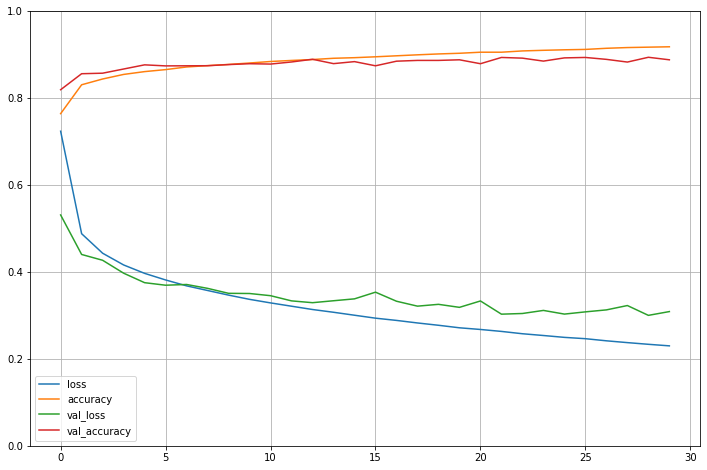

In [7]:
# plot the model history 

import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize = (12,8))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [8]:
#evulate model with test data. 

model.evaluate(x_test, y_test)

313/313 [==============================] - 0s 901us/step - loss: 60.5470 - accuracy: 0.8500


[60.54697036743164, 0.8500000238418579]

In [13]:
# throw in predictions

x_new = x_test[:5]
y_proba = model.predict(x_new)
y_proba

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.]], dtype=float32)

In [24]:
# predict the classes not the probabilities 

y_pred = np.argmax(model.predict(x_new), axis = 1)
for pred, act in zip(y_pred, y_test[:5]) :
    print(class_names[pred], class_names[act])

Ankle boot Ankle boot
Pullover Pullover
Trouser Trouser
Trouser Trouser
Shirt Shirt


In [30]:
# let's try a regression problem

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()

x_train, x_test, y_train, y_test = train_test_split(housing.data, housing.target, test_size = .2)

scaler = StandardScaler()

x_train = scaler.fit_transform(x_train)
x_test = scaler.fit(x_test)

In [31]:
 x_train[:3]

array([[-0.35507645,  0.18607013, -0.03201894, -0.13584078,  0.17028792,
         0.02270239, -1.36661297,  1.25349331],
       [ 0.36472948,  1.37553588, -0.22797016, -0.14081162,  0.38398553,
        -0.07966818,  1.09651197, -1.503967  ],
       [-0.02795402,  0.66185643,  0.13719618, -0.02112337, -0.65149234,
        -0.00916576,  1.22787864, -1.23470324]])